# sine_grating_fft_test_gen2_save
Test save and read data.

100


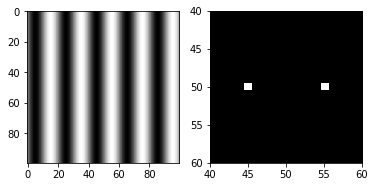

In [1]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-50, 50, 1)
X, Y = np.meshgrid(x, x)
wavelength = 20
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([40, 60])
plt.ylim([60, 40])  # Note, order is reversed for y
print(len(x))
plt.show()

100


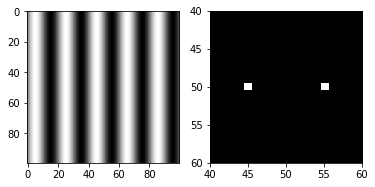

In [2]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, x)
wavelength = 20
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([40, 60])
plt.ylim([60, 40])  # Note, order is reversed for y
print(len(x))
plt.show()

## without saving file

fft min =  0.0
fft max = 5000.000000000002


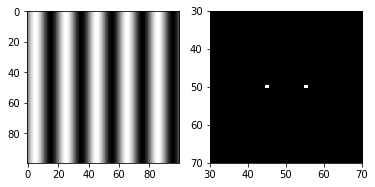

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.generator2 as gen2
grating = gen2.sinusoidal_grating(100, 20, 0)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([30, 70])
plt.ylim([70, 30])  # Note, order is reversed for y
print("fft min = ", min(map(min, abs(ft))))
print("fft max =", max(map(max, abs(ft))))
plt.show()

## with saving file -- with center peak (dc component)

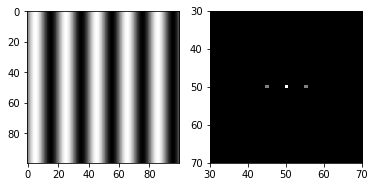

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.generator2 as gen2
from PIL import Image
#grating = gen2.sinusoidal_grating(100, 20, 0)
im_out = gen2.create_png_image_sinusoidal_grating(Image, 100, 20, 0)
ofname = "data5/sin_grat_test.png"
im_out.save(ofname, 'PNG')

ifname = f"{ofname}"
im_in = plt.imread(ifname).astype(float)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(im_in)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(im_in)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([30, 70])
plt.ylim([70, 30])  # Note, order is reversed for y
plt.show()

## with saving file -- without center peak

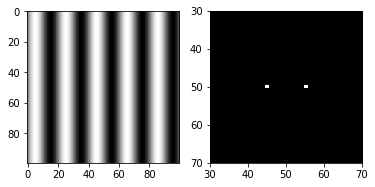

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.generator2 as gen2
from PIL import Image
#grating = gen2.sinusoidal_grating(100, 20, 0)
im_out = gen2.create_png_image_sinusoidal_grating(Image, 100, 20, 0)
ofname = "data5/sin_grat_test.png"
im_out.save(ofname, 'PNG')

ifname = f"{ofname}"
im_in = plt.imread(ifname).astype(float)

# forcoe sign of float -- substract with half (max - min)
im_sign = []
xmin = min(map(min, im_in))
xmax = max(map(max, im_in))
for j in im_in:
    row = []
    for i in j:
        val = i - 0.5 * (xmax - xmin)
        row.append(val)
    im_sign.append(row)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(im_sign)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(im_sign)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([30, 70])
plt.ylim([70, 30])  # Note, order is reversed for y
plt.show()

**Note**: Center peak can be removed by assuming shift of half (max - min)